<a href="https://colab.research.google.com/github/Value1965/Citilink/blob/main/%D0%A1%D0%B8%D1%82%D0%B8%D0%BB%D0%B8%D0%BD%D0%BA_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Загрузим нужные библиотеки

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from datetime import datetime

%matplotlib inline

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/hacks_ai_2022/Ситилинк/train_dataset_train.csv')#("/content/train.csv")
df_sample_solution = pd.read_csv('/content/drive/MyDrive/hacks_ai_2022/Ситилинк/sample_solution.csv')#("/content/sample_solution.csv")

df_named = pd.read_csv('/content/drive/MyDrive/hacks_ai_2022/Ситилинк/named.csv')#("/content/named.csv")
df_type_contract = pd.read_csv('/content/drive/MyDrive/hacks_ai_2022/Ситилинк/type_contract.csv')#("/content/type_contract.csv")
df_log = pd.read_csv('/content/drive/MyDrive/hacks_ai_2022/Ситилинк/log.csv')#("/content/log.csv")

## Рассмотрим датасет по ближе

In [ ]:
df_train.head(3)

,contract_id,blocked
0,7780,0
1,7785,0
2,7794,0


In [ ]:
df_train['blocked'].value_counts()

0    5294
1     698
Name: blocked, dtype: int64

In [ ]:
df_named.head(3)

,date,url,contract_id
0,17-Apr-2021,webmail.sampo.ru,101397
1,17-Apr-2021,webmail.sampo.ru,179624
2,17-Apr-2021,tvip-provision.sampo.ru,190335


In [ ]:
blocked_list=pd.merge(df_train[df_train['blocked']==1],df_named,on="contract_id",how="inner")['url'].value_counts().keys().to_list()
unblocked_list=pd.merge(df_train[df_train['blocked']==0],df_named,on="contract_id",how="inner")['url'].value_counts().keys().to_list()
Bset = frozenset(blocked_list)
C = [item for item in unblocked_list if item not in Bset]  # C = A - Balanced
C

['vmxott.svc.iptv.rt.ru',
 'sz-mrsk-itv01.svc.iptv.rt.ru',
 'sus.sampo.ru',
 'sz-mrsk-itv02.svc.iptv.rt.ru',
 'mail.sampo.ru',
 'sz-mrsk-itv03.svc.iptv.rt.ru',
 'sz-mrsk-itv04.svc.iptv.rt.ru',
 'appstore.iptv.rt.ru',
 'upgrade.svc.iptv.rt.ru',
 'time.sampo.ru',
 '91853.vpbx.sampo.ru',
 'vod-ott.svc.iptv.rt.ru',
 'camera.rt.ru',
 'acs.rt.ru',
 'sz-spbr-itv04.svc.iptv.rt.ru',
 'capsule2.nw.rt.ru',
 'broadcast02.sampo.ru',
 'streamer.camera.rt.ru',
 '_ldap._tcp.dc._msdcs.sz.rt.ru',
 'lk.smarthome.rt.ru',
 'cdn.camera.rt.ru',
 'cnt-lbrc-itv01.svc.iptv.rt.ru',
 'fe-sth.svc.iptv.rt.ru',
 'sz-sktv-itv02.svc.iptv.rt.ru',
 'ntp.sampo.ru',
 'wpad.sampo.ru',
 'company.rt.ru',
 'cnt-kurs-itv02.svc.iptv.rt.ru',
 'hlsstr01.svc.iptv.rt.ru',
 'srt02kms01.rt.ru',
 'portal.capsule.nw.rt.ru',
 'bill.nw.rt.ru',
 'isatap.sz.rt.ru',
 'cnt-lptz-itv02.svc.iptv.rt.ru',
 'sz.rt.ru',
 'time.svc.iptv.rt.ru',
 '_ldap._tcp.dc._msdcs.sampo.ru',
 'capsule.nw.rt.ru',
 'media-msk2.camera.rt.ru',
 '_bittorrent-tracker._

In [ ]:
df_named.insert(3,'blocked_url',df_named['url'])
df_named['blocked_url']=df_named['blocked_url'].apply(lambda x: 1 if(x in blocked_list) else 0)

df_named.insert(3,'unblocked_url',df_named['url'])
df_named['unblocked_url']=df_named['unblocked_url'].apply(lambda x: 1 if(x in unblocked_list) else 0)



In [ ]:
df_named['url'].value_counts().keys().to_list()

['camera.rt.ru',
 'vmxott.svc.iptv.rt.ru',
 'tvip-provision.sampo.ru',
 'webmail.sampo.ru',
 'statserv.sampo.ru',
 '193755.16.rt.ru',
 '_sip._udp.193755.16.rt.ru',
 '_sip._tcp.193755.16.rt.ru',
 '530237.16.rt.ru',
 '048056.16.rt.ru',
 '_sip._udp.048056.16.rt.ru',
 'st44-broadcast.sampo.ru',
 'fe-nw.svc.iptv.rt.ru',
 'navigator.sampo.ru',
 'sz-ptzv-itv02.svc.iptv.rt.ru',
 '_sip._udp.173428.16.rt.ru',
 '173428.16.rt.ru',
 'fnc.rt.ru',
 'moigorod.sampo.ru',
 '_sip._tcp.173428.16.rt.ru',
 'swap.sampo.ru',
 'acs.rt.ru',
 'sz-ptzv-itv01.svc.iptv.rt.ru',
 'sampo.ru',
 'lk.sampo.ru',
 'ohrana.sampo.ru',
 'vhod.sampo.ru',
 'sz-spbr-itv01.svc.iptv.rt.ru',
 'st46-broadcast.sampo.ru',
 'mail.sampo.ru',
 'sus.sampo.ru',
 'camera-updater.camera.rt.ru',
 'st45-broadcast.sampo.ru',
 'vitrina.sampo.ru',
 'data.sampo.ru',
 'sz-mrsk-itv01.svc.iptv.rt.ru',
 'profile.sampo.ru',
 'sz-mrsk-itv03.svc.iptv.rt.ru',
 'sz-spbr-itv05.svc.iptv.rt.ru',
 'storage44.swap.sampo.ru',
 'sz-mrsk-itv02.svc.iptv.rt.ru',
 'k

In [ ]:
blocked_log=pd.merge(df_train[df_train['blocked']==1],df_log,on="contract_id",how="inner")['event_type'].value_counts().keys().to_list()
unblocked_log=pd.merge(df_train[df_train['blocked']==0],df_log,on="contract_id",how="inner")['event_type'].value_counts().keys().to_list()
Bset = frozenset(blocked_log)
C = [item for item in unblocked_log if item not in Bset]  # C = A - B
C

['Родительский контроль. Включение',
 'Родительский контроль. Выключение',
 'Восстановление пароля',
 'Включена 10% скидка',
 'Уведомления: отключение',
 'Становление участником бонусной программы',
 'Тайный покупатель',
 'Отключение автоматической активации ГП',
 'Включение управления услугами по паролю',
 'Отключение скидки 10%',
 'Изменение схемы оплаты',
 'Изменение пакета HD. Закрытие лендинг-информера',
 'Предложение доп.гарантии на роутер',
 'Отключение управления услугами по паролю',
 'Подписка на ivi. Включение триала',
 'Предложение расширенной гарантии на ТВ приставку',
 'Подписка на ivi. Отключение автопродления подписки',
 'Включение старых условий аренды',
 'Предложение роутера',
 'Возвращение гарантированного платежа',
 'Общий счет. Отсоединение от донора',
 'Общий счет. Отсоединение реципиента',
 'Закрытие информатора об изменении уведомлений через ВК платформу',
 'Окончание рассрочки за подключение']

In [ ]:
blocked_log

['Информер ВК. Показ',
 'Обращение в службу заботы о клиентах',
 'Включение интернета на 20 минут',
 'Гарантированный платеж за деньги',
 'Виртуальное бессмертие. Использование',
 'Оборудование',
 'Включение интернета на 20 минут с IVR',
 'Отключение услуги Аренда ТВ-приставки',
 'Внутреннее сообщение',
 'Изменение истории',
 'Добавление в Обращались с номеров',
 'Смена пароля',
 'Смена тарифа',
 'Предложение ТВ',
 'Изменение данных клиента',
 'Состояние клиентского оборудования',
 'Перенос денежных средств',
 'Активация гарантированного платежа',
 'Операция с mac-адресом',
 'Получение подарка в ЛК: сутки интернета на максимальной скорости',
 'Просмотр раздела Тайный покупатель',
 'Получение подарка в ЛК: 1 месяц бесплатного просмотра IPTV',
 'Закрепление сообщения',
 'Активация точки подключения на сутки',
 'Смена IP-адреса',
 'Принято заявление и доп. соглашение по переезду',
 'Отключение услуги Автоплатёж',
 'Включение IPTV-пакета',
 'Предложение IPTV',
 'Предложение тарифа',
 'Реес

In [ ]:
df_log[df_log['event_type'].str.contains(r'\bВключен')|df_log['event_type'].str.contains(r'\bАктивация')|df_log['event_type'].str.contains(r'\bПродлен')]

,contract_id,event_date,event_type
3,36294,2021-03-28 16:29:56,Включение IPTV-пакета
13,36294,2021-04-07 15:37:55,Продление действия тарифа
19,34240,2021-04-07 17:38:20,Продление действия тарифа
25,36809,2021-03-29 16:25:16,Активация точки подключения на сутки
46,13137,2021-04-22 12:39:58,Продление действия тарифа
...,...,...,...
25250,54391,2021-04-04 22:11:40,Включение интернета на 20 минут
25260,11801,2021-03-26 22:36:55,Включение IPTV-пакета
25263,11801,2021-04-10 14:22:48,Включение IPTV-пакета
25266,11801,2021-04-27 21:27:31,Включение IPTV-пакета


In [ ]:
df_type_contract.head(3)

,contract_id,day_or_month_contract
0,7780,0
1,3996,0
2,7785,0


In [ ]:
df_log.head(3)

,contract_id,event_date,event_type
0,36294,2021-03-28 16:24:30,Добавление в Обращались с номеров
1,36294,2021-03-28 16:27:41,Обращение в службу заботы о клиентах
2,36294,2021-03-28 16:29:56,Выключение IPTV-пакета


In [ ]:
max_date=max(df_log['event_date'])

In [ ]:
#df_log.insert(3,'howlongago',df_log['event_date'])


In [ ]:
df_log.head(20)
#df_log.info()

,contract_id,event_date,event_type
0,36294,2021-03-28 16:24:30,Добавление в Обращались с номеров
1,36294,2021-03-28 16:27:41,Обращение в службу заботы о клиентах
2,36294,2021-03-28 16:29:56,Выключение IPTV-пакета
3,36294,2021-03-28 16:29:56,Включение IPTV-пакета
4,36294,2021-03-28 16:35:04,Обращение в службу заботы о клиентах
5,36294,2021-03-28 16:37:26,Обращение в службу заботы о клиентах
6,36294,2021-04-01 18:06:15,Обращение в службу заботы о клиентах
7,36294,2021-04-06 17:32:09,Отключение услуги Аренда ТВ-приставки
8,36294,2021-04-06 17:32:10,Отключение услуги Аренда ТВ-приставки
9,36294,2021-04-06 17:32:13,Оборудование


In [ ]:
df_log['event_type'].value_counts().keys().tolist()

['Информер ВК. Показ',
 'Включение интернета на 20 минут',
 'Обращение в службу заботы о клиентах',
 'Гарантированный платеж за деньги',
 'Виртуальное бессмертие. Использование',
 'Турбокнопка бесплатно',
 'Включение интернета на 20 минут с IVR',
 'Смена тарифа',
 'Состояние клиентского оборудования',
 'Смена пароля',
 'Оборудование',
 'Изменение истории',
 'Показ информатора об изменении уведомлений через ВК платформу',
 'Предложение ТВ',
 'Добавление в Обращались с номеров',
 'Внутреннее сообщение',
 'Включение IPTV-пакета',
 'Предложение тарифа',
 'Просмотр раздела Тайный покупатель',
 'Операция с mac-адресом',
 'Включение автоматической активации ГП',
 'Изменение данных клиента',
 'Реестр договоров',
 'Отключение услуги Аренда ТВ-приставки',
 'Получение подарка в ЛК: сутки интернета на максимальной скорости',
 'Получение подарка в ЛК: 1 месяц бесплатного просмотра IPTV',
 'Активация гарантированного платежа',
 'Предложение IPTV',
 'Выключение IPTV-пакета',
 'Турбокнопка платно (1 ч

In [ ]:
df_named.head(30)

,date,url,contract_id,unblocked_url,blocked_url
0,17-Apr-2021,webmail.sampo.ru,101397,1,1
1,17-Apr-2021,webmail.sampo.ru,179624,1,1
2,17-Apr-2021,tvip-provision.sampo.ru,190335,1,0
3,17-Apr-2021,tvip-provision.sampo.ru,61670,1,0
4,17-Apr-2021,tvip-provision.sampo.ru,39370,1,0
5,17-Apr-2021,old-statserv.sampo.ru,86324,1,1
6,17-Apr-2021,statserv.sampo.ru,188387,1,1
7,17-Apr-2021,statserv.sampo.ru,74506,1,1
8,17-Apr-2021,swap.sampo.ru,201689,1,1
9,17-Apr-2021,swap.sampo.ru,202488,1,1


In [ ]:
#count_named=df_named.groupby('contract_id').agg({'url':'count','blocked_url':'sum'})
count_named=df_named.groupby('contract_id').agg({'blocked_url':'sum','unblocked_url':'sum'})
#count_named=df_named.groupby('contract_id').agg({'url':'count'})

In [ ]:
count_named.head(4)

,blocked_url,unblocked_url
contract_id,,
3455,22,24
3458,1,1
3459,2,2
3460,10,10


Узнаем размерность наборов

In [ ]:
print("df_train", df_train.shape)
print("df_named", df_named.shape)
print("df_sample_solution", df_sample_solution.shape)
print("df_type_contract", df_type_contract.shape)
print("df_log", df_log.shape)

df_train (5992, 2)
df_named (10646537, 5)
df_sample_solution (810, 2)
df_type_contract (6805, 2)
df_log (25274, 3)


### Видоизмение данных

In [ ]:
df_log['howlongago']=df_log['event_date'].apply(lambda x:(datetime.strptime(max_date,"%Y-%m-%d %H:%M:%S")-datetime.strptime(x,"%Y-%m-%d %H:%M:%S")).days)     
df_log['event_type'].value_counts()         

Информер ВК. Показ                                                  8001
Включение интернета на 20 минут                                     4092
Обращение в службу заботы о клиентах                                2860
Гарантированный платеж за деньги                                    2679
Виртуальное бессмертие. Использование                                757
                                                                    ... 
Футболка Ситилинк                                                      1
Закрытие информатора об изменении уведомлений через ВК платформу       1
Окончание рассрочки за подключение                                     1
Общий счет. Отсоединение реципиента                                    1
Общий счет. Отсоединение от донора                                     1
Name: event_type, Length: 105, dtype: int64

Обьединим два набора с данными

In [ ]:
df_train = pd.merge(df_train, df_type_contract , on="contract_id", how='left').drop_duplicates(subset="contract_id")

df_train.head(3)

,contract_id,blocked,day_or_month_contract
0,7780,0,0.0
1,7785,0,0.0
2,7794,0,0.0


In [ ]:
df_tvboxoff=df_log[df_log['event_type']=='Отключение услуги Аренда ТВ-приставки'].drop(['event_date','event_type','howlongago'],axis=1).drop_duplicates()
df_tvboxoff.insert(1,'tvboxoff',1)
df_tvboxoff['tvboxoff']=df_tvboxoff['tvboxoff'].astype(int)

df_clientservice=df_log[df_log['event_type']=='Обращение в службу заботы о клиентах'].drop(['event_date','event_type','howlongago'],axis=1).drop_duplicates()
df_clientservice.insert(1,'clientservice',1)
df_clientservice['clientservice']=df_clientservice['clientservice'].astype(int)

df_tariffchange=df_log[df_log['event_type']=='Смена тарифа'].drop(['event_date','event_type','howlongago'],axis=1).drop_duplicates()
df_tariffchange.insert(1,'tariffchange',1)
df_tariffchange['tariffchange']=df_tariffchange['tariffchange'].astype(int)

df_informer=df_log[df_log['event_type']=='Информер ВК. Показ'].drop(['event_date','event_type','howlongago'],axis=1).drop_duplicates()
df_informer.insert(1,'informer',1)
df_informer['informer']=df_informer['informer'].astype(int)

df_turnon20=df_log[df_log['event_type']=='Включение интернета на 20 минут'].drop(['event_date','event_type','howlongago'],axis=1).drop_duplicates()
df_turnon20.insert(1,'turnon20',1)
df_turnon20['turnon20']=df_turnon20['turnon20'].astype(int)

df_guaranteedpayment=df_log[df_log['event_type']=='Гарантированный платеж за деньги'].drop(['event_date','event_type','howlongago'],axis=1).drop_duplicates()
df_guaranteedpayment.insert(1,'guaranteedpayment',1)
df_guaranteedpayment['guaranteedpayment']=df_guaranteedpayment['guaranteedpayment'].astype(int)


df_equipment=df_log[df_log['event_type']=='Оборудование'].drop(['event_date','event_type','howlongago'],axis=1).drop_duplicates()
df_equipment.insert(1,'equipment',1)
df_equipment['equipment']=df_equipment['equipment'].astype(int)

df_block=df_log[(df_log['event_type']=='Расторжение')|(df_log['event_type']=='Блокировка')|(df_log['event_type']=='Отключение  ограничения функций ТВ')|(df_log['event_type']=='Отмена гарантированного платежа')].drop(['event_date','event_type','howlongago'],axis=1).drop_duplicates()
df_block.insert(1,'block',1)
df_block['block']=df_block['block'].astype(int)


df_unblock=df_log[df_log['event_type'].isin(C)].drop(['event_date','event_type','howlongago'],axis=1).drop_duplicates()
df_unblock.insert(1,'unblock',1)
df_unblock['unblock']=df_unblock['unblock'].astype(int)
#df_unblock=df_unblock.groupby("contract_id").agg({'unblock' : 'count'})

df_turnon=df_log[df_log['event_type'].str.contains(r'\bВключен')|df_log['event_type'].str.contains(r'\bАктивация')|df_log['event_type'].str.contains(r'\bПродлен')].drop(['event_date','event_type','howlongago'],axis=1) #.drop_duplicates()
df_turnon.insert(1,'turnon',1)
df_turnon['turnon']=df_turnon['turnon'].astype(int)
df_turnon=df_turnon.groupby("contract_id").agg({'turnon' : 'count'})

In [ ]:
df_turnon

,turnon
contract_id,
3458,3
3460,1
3462,1
3465,4
3466,1
...,...
273849,2
273908,1
274321,4


Добавим столбец - колличество обращений человека

In [ ]:
count_log = df_log.groupby("contract_id").agg({'event_date':'count','event_type':'count','howlongago':'min'})

count_log.head(3)

,event_date,event_type,howlongago
contract_id,,,
3453,1,1,57
3454,1,1,1
3456,4,4,39


In [ ]:
df_train = pd.merge(df_train, count_log , on="contract_id", how='left').drop(["event_type"],axis =1)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5992 entries, 0 to 5991
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   contract_id            5992 non-null   int64  
 1   blocked                5992 non-null   int64  
 2   day_or_month_contract  5990 non-null   float64
 3   event_date             3809 non-null   float64
 4   howlongago             3809 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 280.9 KB


In [ ]:
df_train = pd.merge(df_train, count_named , on="contract_id", how='left')

In [ ]:
df_train = pd.merge(df_train, df_tvboxoff , on="contract_id", how='left')
df_train = pd.merge(df_train, df_clientservice , on="contract_id", how='left')
df_train = pd.merge(df_train, df_tariffchange , on="contract_id", how='left')
df_train = pd.merge(df_train, df_informer , on="contract_id", how='left')
df_train = pd.merge(df_train, df_turnon20 , on="contract_id", how='left')
df_train = pd.merge(df_train, df_guaranteedpayment , on="contract_id", how='left')
df_train = pd.merge(df_train, df_equipment , on="contract_id", how='left')
df_train = pd.merge(df_train, df_unblock , on="contract_id", how='left')
df_train = pd.merge(df_train, df_turnon , on="contract_id", how='left')

df_train['tvboxoff']=df_train['tvboxoff'].fillna(0)
df_train['tvboxoff']=df_train['tvboxoff'].astype(int)

df_train['clientservice']=df_train['clientservice'].fillna(0)
df_train['clientservice']=df_train['clientservice'].astype(int)

df_train['tariffchange']=df_train['tariffchange'].fillna(0)
df_train['tariffchange']=df_train['tariffchange'].astype(int)

df_train['informer']=df_train['informer'].fillna(0)
df_train['informer']=df_train['informer'].astype(int)

df_train['turnon20']=df_train['turnon20'].fillna(0)
df_train['turnon20']=df_train['turnon20'].astype(int)

df_train['guaranteedpayment']=df_train['guaranteedpayment'].fillna(0)
df_train['guaranteedpayment']=df_train['guaranteedpayment'].astype(int)

df_train['equipment']=df_train['equipment'].fillna(0)
df_train['equipment']=df_train['equipment'].astype(int)

df_train['unblock']=df_train['unblock'].fillna(0)
df_train['unblock']=df_train['unblock'].astype(int)

df_train['turnon']=df_train['turnon'].fillna(0)
df_train['turnon']=df_train['turnon'].astype(int)

df_train['unblocked_url']=df_train['unblocked_url'].fillna(0)
df_train['unblocked_url']=df_train['unblocked_url'].astype(int)


df_train['blocked_url']=df_train['blocked_url'].fillna(0)
df_train['blocked_url']=df_train['blocked_url'].astype(int)

df_train['day_or_month_contract']=df_train['day_or_month_contract'].fillna(0)
df_train['day_or_month_contract']=df_train['day_or_month_contract'].astype(int)

df_train['howlongago']=df_train['howlongago'].fillna(0)
df_train['howlongago']=df_train['howlongago'].astype(int)

In [ ]:
max(df_train['howlongago'])

59

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5992 entries, 0 to 5991
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   contract_id            5992 non-null   int64  
 1   blocked                5992 non-null   int64  
 2   day_or_month_contract  5992 non-null   int64  
 3   event_date             3809 non-null   float64
 4   howlongago             5992 non-null   int64  
 5   blocked_url            5992 non-null   int64  
 6   unblocked_url          5992 non-null   int64  
 7   tvboxoff               5992 non-null   int64  
 8   clientservice          5992 non-null   int64  
 9   tariffchange           5992 non-null   int64  
 10  informer               5992 non-null   int64  
 11  turnon20               5992 non-null   int64  
 12  guaranteedpayment      5992 non-null   int64  
 13  equipment              5992 non-null   int64  
 14  unblock                5992 non-null   int64  
 15  turn

Заменим пропуски на нули

In [ ]:
df_train = df_train.fillna(0)

In [ ]:
df_train['day_or_month_contract']=df_train['day_or_month_contract'].astype(int)
df_train['event_date']=df_train['event_date'].apply(lambda x: int(x))

In [ ]:
cat_cols=['day_or_month_contract','tvboxoff','clientservice','tariffchange','informer','turnon20','guaranteedpayment']
#cat_cols=['tvboxoff','clientservice','informer','turnon20','guaranteedpayment']
cat_cols=['day_or_month_contract','tvboxoff','clientservice','informer','turnon20','guaranteedpayment','equipment','unblock']
#cat_cols=['tvboxoff','clientservice','informer','guaranteedpayment']
cat_cols=['day_or_month_contract','tvboxoff','clientservice','informer','guaranteedpayment','unblock']
#cat_cols=['tvboxoff','informer','unblock']
#cat_cols=['day_or_month_contract','tvboxoff','clientservice','informer','turnon20','guaranteedpayment','unblock']
#cat_cols=['day_or_month_contract','tvboxoff','clientservice','informer','guaranteedpayment']

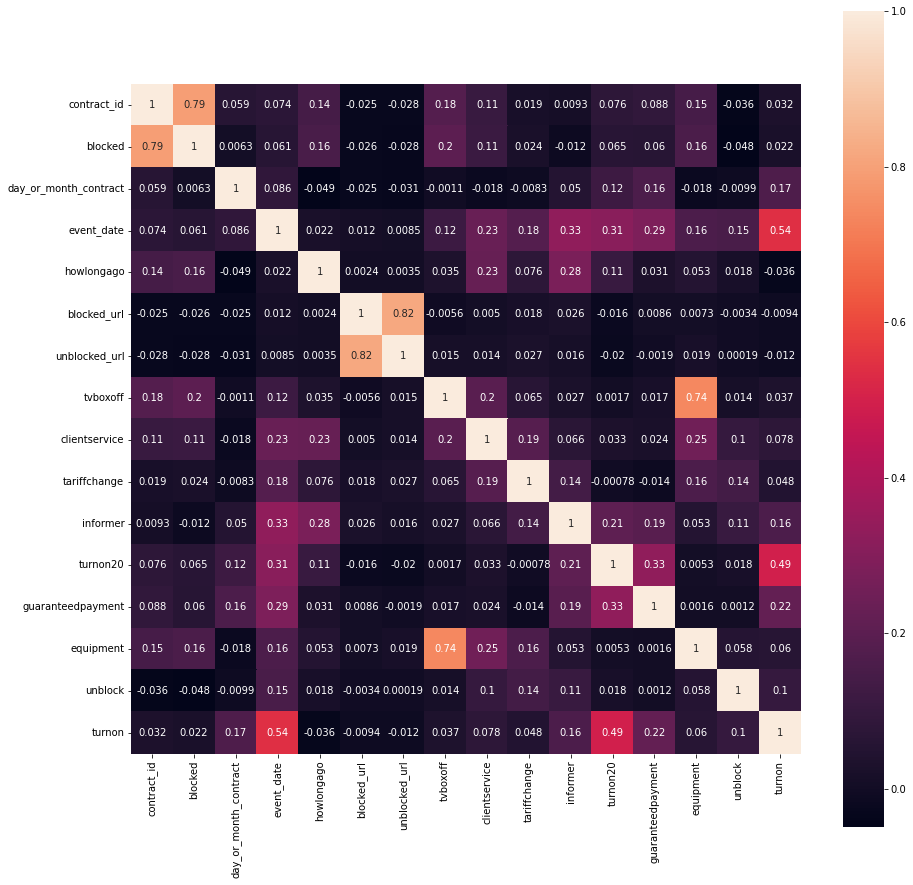

In [ ]:
plt.rcParams['figure.figsize']=(15,15)

corr = df_train.corr()
g = sns.heatmap(corr, square = True, annot=True)

## Выделим выборки

In [ ]:
#X = df_train.drop(["day_or_month_contract","contract_id", "blocked",'tariffchange'], axis = 1)
X = df_train.drop(["contract_id", "blocked",'tariffchange','equipment','turnon20'], axis = 1) # ,'day_or_month_contract'
#X = df_train.drop(["contract_id", "blocked",'tariffchange','equipment'], axis = 1)
y = df_train[["blocked"]]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5992 entries, 0 to 5991
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   day_or_month_contract  5992 non-null   int64
 1   event_date             5992 non-null   int64
 2   howlongago             5992 non-null   int64
 3   blocked_url            5992 non-null   int64
 4   unblocked_url          5992 non-null   int64
 5   tvboxoff               5992 non-null   int64
 6   clientservice          5992 non-null   int64
 7   informer               5992 non-null   int64
 8   guaranteedpayment      5992 non-null   int64
 9   unblock                5992 non-null   int64
 10  turnon                 5992 non-null   int64
dtypes: int64(11)
memory usage: 561.8 KB


In [ ]:
X.head()

,day_or_month_contract,event_date,howlongago,blocked_url,unblocked_url,tvboxoff,clientservice,informer,guaranteedpayment,unblock,turnon
0,0,9,1,83,83,0,1,0,0,0,0
1,0,1,30,10,10,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,7,36,0,0,0,0,1,0,0,4
4,0,3,12,0,0,0,0,1,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Обучение модели

In [ ]:
clf = CatBoostClassifier(random_state=0,cat_features=cat_cols,auto_class_weights='Balanced',depth=6,boosting_type='Ordered')

In [ ]:
clf.fit(X_train, y_train)

Learning rate set to 0.020117
0:	learn: 0.6897728	total: 13.3ms	remaining: 13.3s
1:	learn: 0.6863406	total: 21.8ms	remaining: 10.9s
2:	learn: 0.6832105	total: 29.9ms	remaining: 9.94s
3:	learn: 0.6795995	total: 37.9ms	remaining: 9.45s
4:	learn: 0.6770107	total: 48.3ms	remaining: 9.61s
5:	learn: 0.6732135	total: 57.1ms	remaining: 9.46s
6:	learn: 0.6700115	total: 63.2ms	remaining: 8.96s
7:	learn: 0.6667272	total: 71.8ms	remaining: 8.91s
8:	learn: 0.6641307	total: 80.1ms	remaining: 8.82s
9:	learn: 0.6611012	total: 90.6ms	remaining: 8.97s
10:	learn: 0.6582516	total: 102ms	remaining: 9.15s
11:	learn: 0.6553608	total: 110ms	remaining: 9.03s
12:	learn: 0.6530331	total: 117ms	remaining: 8.91s
13:	learn: 0.6504726	total: 125ms	remaining: 8.84s
14:	learn: 0.6487157	total: 135ms	remaining: 8.87s
15:	learn: 0.6463438	total: 150ms	remaining: 9.21s
16:	learn: 0.6436414	total: 159ms	remaining: 9.19s
17:	learn: 0.6424440	total: 167ms	remaining: 9.11s
18:	learn: 0.6403629	total: 175ms	remaining: 9.04s
1

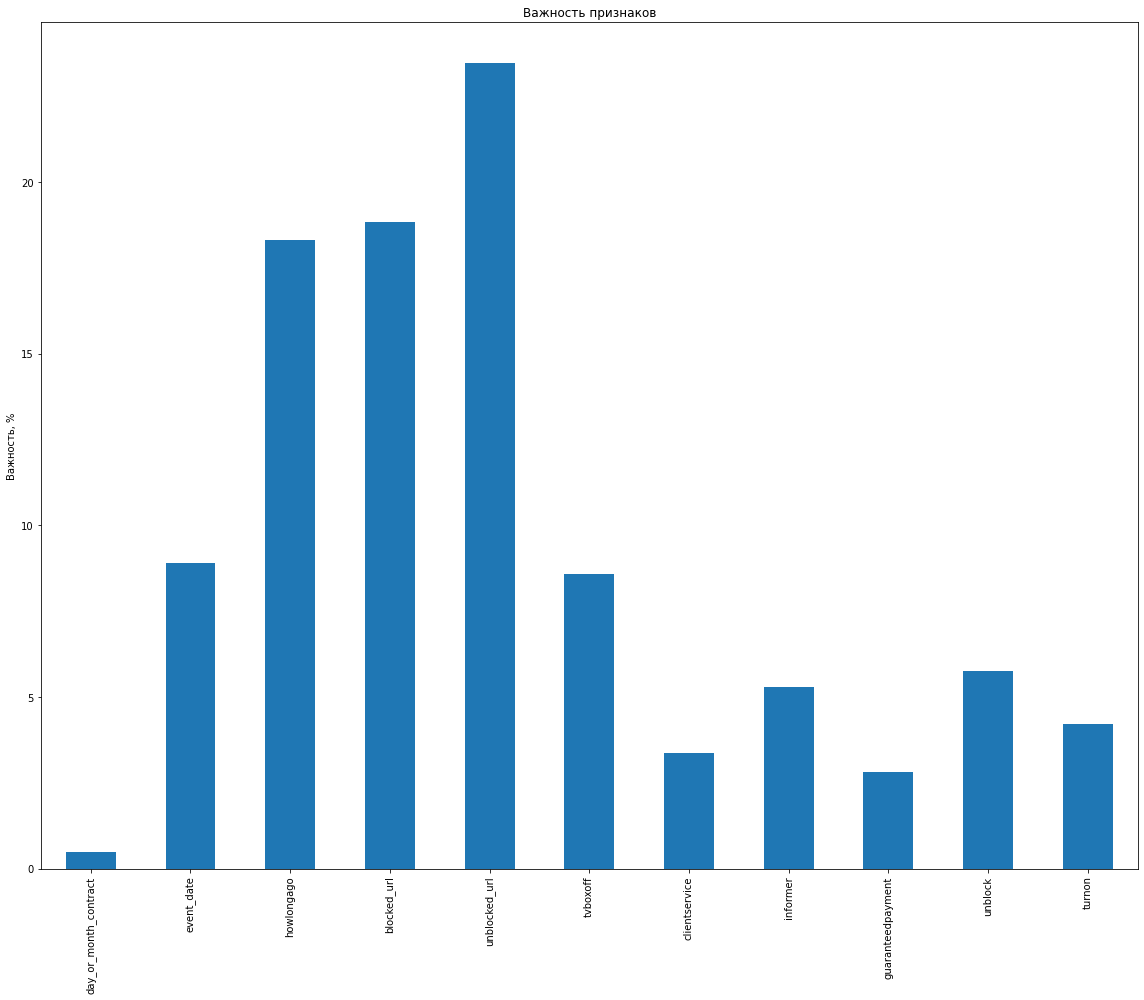

In [ ]:
cv1_imp = pd.Series(clf.get_feature_importance(),index=X_train.columns)

fig, ax = plt.subplots(figsize=(16,14))
cv1_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность, %')
fig.tight_layout()

In [ ]:
#'selected_features_names': ['tvboxoff',
  #'clientservice',
  #'informer',
  #'turnon20',
  #'guaranteedpayment',
  #'unblock']}

## Оценка точности

In [ ]:
pred = clf.predict(X_test)

In [ ]:
y_test.head(3)

,blocked
2404,0
1916,0
2503,0


In [ ]:
from sklearn.metrics import recall_score

print("Recall score:", recall_score(y_test, pred, average='macro'))

Recall score: 0.71145390302951


In [ ]:
y_test.columns.values

array(['blocked'], dtype=object)

In [ ]:
clf = CatBoostClassifier(random_state=0,cat_features=cat_cols,auto_class_weights='Balanced',depth=6,boosting_type='Ordered')
clf.select_features(X,y,features_for_select=cat_cols,num_features_to_select=3)
#['event_date','howlongago','blocked_url']

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train = X
y_train = y
clf = CatBoostClassifier(random_state=0,cat_features=cat_cols,auto_class_weights='Balanced',depth=6,boosting_type='Ordered')
clf.fit(X_train, y_train)

In [ ]:
#df_solution=pd.merge(df_sample_solution,df_train,on='contract_id',how='inner')
df_solution = pd.merge(df_sample_solution, df_type_contract , on="contract_id", how='left').drop_duplicates(subset="contract_id")
df_solution = pd.merge(df_solution, count_log , on="contract_id", how='left').drop(["event_type"],axis =1)
df_solution = pd.merge(df_solution, count_named , on="contract_id", how='left')#.drop(["date"],axis =1)
df_solution = pd.merge(df_solution, df_tvboxoff , on="contract_id", how='left')
df_solution = pd.merge(df_solution, df_clientservice , on="contract_id", how='left')#.drop_duplicates(subset="contract_id")
df_solution = pd.merge(df_solution, df_tariffchange , on="contract_id", how='left')
df_solution = pd.merge(df_solution, df_informer , on="contract_id", how='left')
df_solution = pd.merge(df_solution, df_turnon20 , on="contract_id", how='left')
df_solution = pd.merge(df_solution, df_guaranteedpayment , on="contract_id", how='left')
df_solution = pd.merge(df_solution, df_equipment , on="contract_id", how='left')
df_solution = pd.merge(df_solution, df_unblock , on="contract_id", how='left')
df_solution = pd.merge(df_solution, df_turnon , on="contract_id", how='left')

df_solution['tvboxoff']=df_solution['tvboxoff'].fillna(0)
df_solution['clientservice']=df_solution['clientservice'].fillna(0)
df_solution['tariffchange']=df_solution['tariffchange'].fillna(0)
df_solution['informer']=df_solution['informer'].fillna(0)
df_solution['turnon20']=df_solution['turnon20'].fillna(0)
df_solution['guaranteedpayment']=df_solution['guaranteedpayment'].fillna(0)
df_solution['equipment']=df_solution['equipment'].fillna(0)
df_solution['unblock']=df_solution['unblock'].fillna(0)
df_solution['turnon']=df_solution['turnon'].fillna(0)

df_solution = df_solution.drop(["contract_id", "blocked"], axis = 1)
df_solution['day_or_month_contract'] = df_solution['day_or_month_contract'].astype(int)
df_solution['tvboxoff']=df_solution['tvboxoff'].astype(int)
df_solution['clientservice']=df_solution['clientservice'].astype(int)
df_solution['tariffchange']=df_solution['tariffchange'].astype(int)
df_solution['informer']=df_solution['informer'].astype(int)
df_solution['turnon20']=df_solution['turnon20'].astype(int)
df_solution['guaranteedpayment']=df_solution['guaranteedpayment'].astype(int)
df_solution['equipment']=df_solution['equipment'].astype(int)
df_solution['unblock']=df_solution['unblock'].astype(int)
df_solution['turnon']=df_solution['turnon'].astype(int)

df_solution['howlongago']=df_solution['howlongago'].fillna(0)

# 100 и 60 одинаковы

df_solution=df_solution.fillna(0)

df_solution = df_solution.drop(['tariffchange','equipment','turnon20'], axis = 1) # ,'day_or_month_contract'

In [ ]:
df_solution.info()

In [ ]:
df_solution.fillna(0)
df_solution['event_date']=df_solution['event_date'].apply(lambda x: int(x))

In [ ]:
pred = clf.predict(df_solution)

In [ ]:
pred

In [ ]:
df_sample_solution['blocked']=pred

In [ ]:
df_sample_solution.to_csv('solution.csv',index=None)